In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from ydata_profiling import ProfileReport

In [73]:
df = pd.read_csv('/Users/admin/Documents/Flatiron/Housing_Prices_and_Flood_Risk/data/merged_df.csv')

In [74]:
df.iloc[:, 10:20]

nuisance     view condition          grade  heat_source sewer_system  \
0           NO     NONE      Good      7 Average          Gas       PUBLIC   
1           NO     NONE   Average      7 Average          Gas       PUBLIC   
2           NO     NONE   Average      7 Average          Gas       PUBLIC   
3           NO     NONE      Good  6 Low Average  Electricity       PUBLIC   
4           NO     NONE   Average         8 Good          Gas       PUBLIC   
...        ...      ...       ...            ...          ...          ...   
29183       NO     NONE   Average  6 Low Average  Electricity      PRIVATE   
29184      YES     NONE   Average  6 Low Average  Electricity      PRIVATE   
29185      YES  AVERAGE      Fair  6 Low Average  Electricity      PRIVATE   
29186      YES     NONE   Average         5 Fair          NaN      PRIVATE   
29187      YES  AVERAGE   Average  6 Low Average  Electricity      PRIVATE   

       sqft_above  sqft_basement  sqft_garage  sqft_patio  
0            1180              0            0          40  
1             930            930          240          90  
2            1240           1240          490          60  
3            1400              0          330         330  
4            1190            590          420         200  
...           ...            ...          ...         ...  
29183        1010              0            0         180  
29184         480              0            0           0  
29185        1040              0            0           0  
29186        1260              0            0         110  
29187        1150              0            0         220  

[29188 rows x 10 columns]

In [76]:
sample = df.sample(10000)

profile_2 = ProfileReport(sample, minimal=True)
profile_2.to_file("output.html")

In [77]:
profile_2

In [78]:
# we didn't clean all the way - have a bunch of zero values to handle. but we apparently should
#train on cleaned data and test on uncleaned?
from itertools import combinations
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [79]:
X = df.drop('price', axis = 1)
y = df['price']

In [80]:
#setting values for test train (30, 70)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
df = pd.concat([X_train, y_train], axis = 1)

In [82]:
df['grade score'] = df['grade'].str.split().str[0]

In [83]:
df['grade score'] = df['grade score'].astype(int)

In [84]:
df.drop(labels='grade', axis=1, inplace=True)

In [85]:
df['condition'].value_counts()

Average      12364
Good          5619
Very Good     2254
Fair           148
Poor            46
Name: condition, dtype: int64

In [86]:
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [87]:
df['on_waterfront'] = df['waterfront'].apply(lambda x: 0 if x == "NO" else 1)

In [88]:
df['near_greenbelt'] = df['greenbelt'].apply(lambda x: 0 if x == "NO" else 1)

In [89]:
df.drop(labels='greenbelt', axis=1, inplace=True)

In [90]:
df.drop(labels='waterfront', axis=1, inplace=True)

In [91]:
df['date'] = pd.to_datetime(df['date'])

In [92]:
df['view'].value_counts()

NONE         17981
AVERAGE       1312
GOOD           599
EXCELLENT      386
FAIR           153
Name: view, dtype: int64

In [93]:
category_labels = {'NONE': 0,
                   'FAIR': 1,
                   'AVERAGE': 2,
                   'GOOD': 3, 
                   'EXCELLENT': 4}
    

# Create a new column 'Label' based on the dictionary values corresponding to the 'Category' column
df['view score'] = df['view'].map(category_labels)

In [94]:
df['condition'].value_counts()

Average      12364
Good          5619
Very Good     2254
Fair           148
Poor            46
Name: condition, dtype: int64

In [95]:
df['nuisance_2'] = df['nuisance'].apply(lambda x: 1 if x == "YES" else 0)

In [96]:
df.drop(labels='nuisance', axis=1, inplace=True)

In [97]:
df.rename(columns={'nuisance_2': 'nuisance'}, inplace=True)

In [98]:
category_labels_2 = {'Poor': 1,
                   'Fair': 2,
                   'Average': 3,
                   'Good': 4, 
                   'Very Good': 5}
    

# Create a new column 'Label' based on the dictionary values corresponding to the 'Category' column
df['condition score'] = df['condition'].map(category_labels_2)

In [99]:
df.drop(labels='condition', axis=1, inplace=True)

In [100]:
df.iloc[:, 5:15]

sqft_lot  floors       view  heat_source sewer_system  sqft_above  \
16025     10364     1.0       NONE          Gas      PRIVATE        1420   
9971      10400     1.0  EXCELLENT          Gas       PUBLIC        2050   
8943       6853     1.0       NONE          Gas       PUBLIC        2170   
19496      3830     2.0       NONE          Gas       PUBLIC        2310   
21740      5200     1.0       NONE          Gas       PUBLIC        1240   
...         ...     ...        ...          ...          ...         ...   
21575     43560     2.0       NONE          Gas      PRIVATE        2020   
5390       4465     2.0       NONE  Electricity       PUBLIC        1955   
860        9509     1.0       NONE          Gas       PUBLIC        1350   
15795      8136     1.0       NONE  Electricity       PUBLIC        1140   
23654      4532     2.0       NONE          Gas       PUBLIC        2310   

       sqft_basement  sqft_garage  sqft_patio  yr_built  
16025              0          380           0      1961  
9971            2050            0         460      1958  
8943               0          580         200      2004  
19496              0          470          50      2006  
21740              0            0          80      1969  
...              ...          ...         ...       ...  
21575              0          530          60      1978  
5390               0          534         150      2013  
860                0          220           0      1955  
15795           1140            0         170      1967  
23654              0          520         190      2004  

[20431 rows x 10 columns]

In [101]:
#profile = ProfileReport(df, tsmode=True, sortby="date", title="Time-Series EDA")
#profile

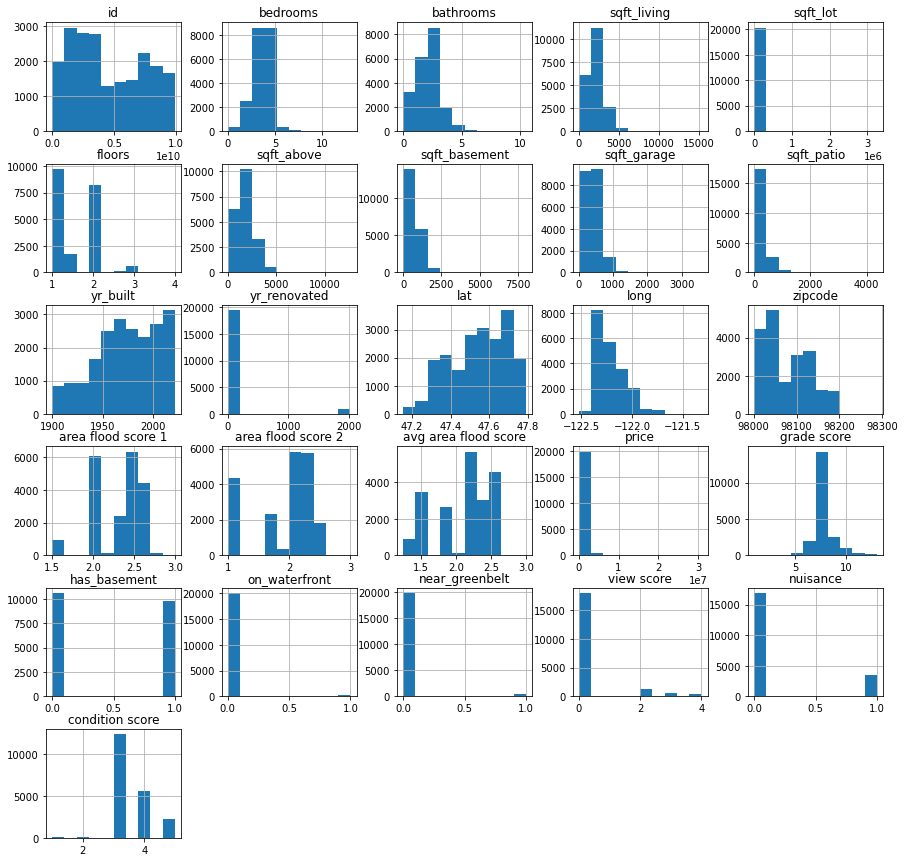

In [102]:
df.hist(figsize = (15,15))
plt.show()

In [103]:
def remove_outliers(df):
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
              'sqft_patio', 'sqft_garage', 'sqft_basement']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [104]:
df_2 = remove_outliers(df)

In [105]:
df_2.sample(10)

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
23776   208000040 2022-04-28         4        3.5         2562     12915   
26572  2586800245 2021-07-07         3        2.0         1470      7655   
24617  3959401880 2021-08-20         2        2.0         1960      4018   
24051  7861300310 2021-07-07         3        2.0         1860     10941   
21592   192480100 2022-02-07         4        0.5         2370      4500   
9900   4036800805 2021-07-15         3        1.5         1240      7269   
11579  2450500175 2021-08-23         2        1.0         1690     11494   
6142    480000060 2021-10-22         4        1.5         1750      3060   
16532  8078800120 2022-05-14         3        2.5         1720      7527   
12076  9407001330 2021-07-12         3        3.0         2370      9750   

       floors  view  heat_source sewer_system  ...  area flood score 2  \
23776     2.0  NONE          Gas      PRIVATE  ...            2.285714   
26572     1.0  NONE          Oil       PUBLIC  ...            2.200000   
24617     1.0  NONE  Electricity       PUBLIC  ...            2.333333   
24051     1.0  NONE          Gas       PUBLIC  ...            2.285714   
21592     2.0  NONE          Gas       PUBLIC  ...            2.333333   
9900      1.0  NONE          Gas       PUBLIC  ...            2.200000   
11579     1.0  NONE          Gas       PUBLIC  ...            2.000000   
6142      2.0  NONE          Gas       PUBLIC  ...            1.000000   
16532     2.0  NONE          Gas       PUBLIC  ...            1.000000   
12076     1.0  NONE  Electricity      PRIVATE  ...            2.500000   

       avg area flood score      price  grade score  has_basement  \
23776              2.357143   949980.0            8             0   
26572              2.300000   812500.0            7             1   
24617              2.500000   629500.0            7             1   
24051              2.357143   600000.0            7             0   
21592              2.500000   701950.0            8             0   
9900               2.300000   965000.0            7             0   
11579              2.250000  1900000.0            7             1   
6142               1.500000   975000.0            7             1   
16532              1.500000  1250000.0            8             0   
12076              2.535714   640000.0            7             1   

       on_waterfront  near_greenbelt  view score nuisance condition score  
23776              0               0           0        1               3  
26572              0               0           0        0               3  
24617              0               0           0        1               5  
24051              0               0           0        0               4  
21592              0               0           0        0               3  
9900               0               0           0        0               5  
11579              0               0           0        0               4  
6142               0               0           0        0               3  
16532              0               0           0        0               3  
12076              0               0           0        0               4  

[10 rows x 33 columns]

In [106]:
# we lost 1400 rows. seems fine! 
df.shape[0] - df_2.shape[0]

1440

In [107]:
df = remove_outliers(df)

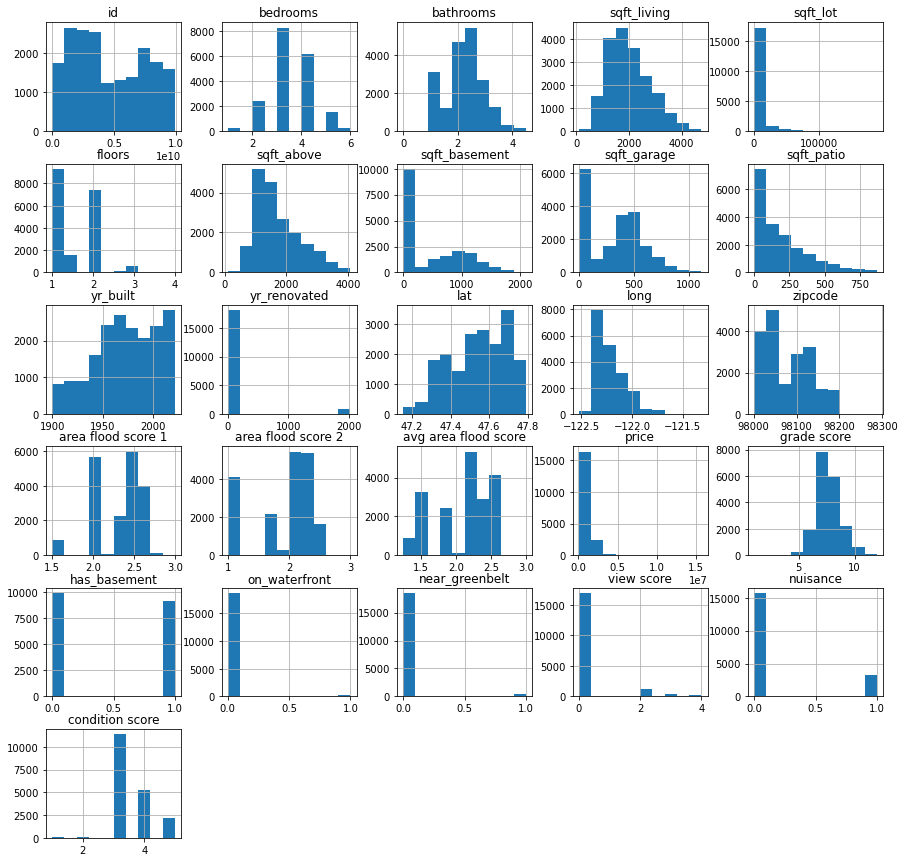

In [108]:
#df.hist(figsize = (15,15))
#plt.show()

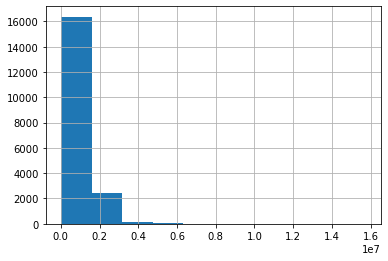

In [109]:
df['price'].hist()
plt.show()

In [110]:
quantile_95 = df['price'].quantile(q = .95)
print(quantile_95)

2200000.0


In [111]:
quantile_97 = df['price'].quantile(q = .97)
quantile_97 

2500000.0

In [112]:
quantile_99 = df['price'].quantile(q = .99)
quantile_99

3200000.0

In [113]:
quantile_999 = df['price'].quantile(q = .999)
quantile_999

5851500.0000003055

In [114]:
quantile_9999 = df['price'].quantile(q = .9999)
quantile_9999 

10348167.599993734

In [115]:
# hmmm, maybe just look at 99 percentile? we can include rich people in our audience but not super-rich?

In [116]:
df = df[df['price']<=3200000]

In [117]:
df.shape


(18805, 33)

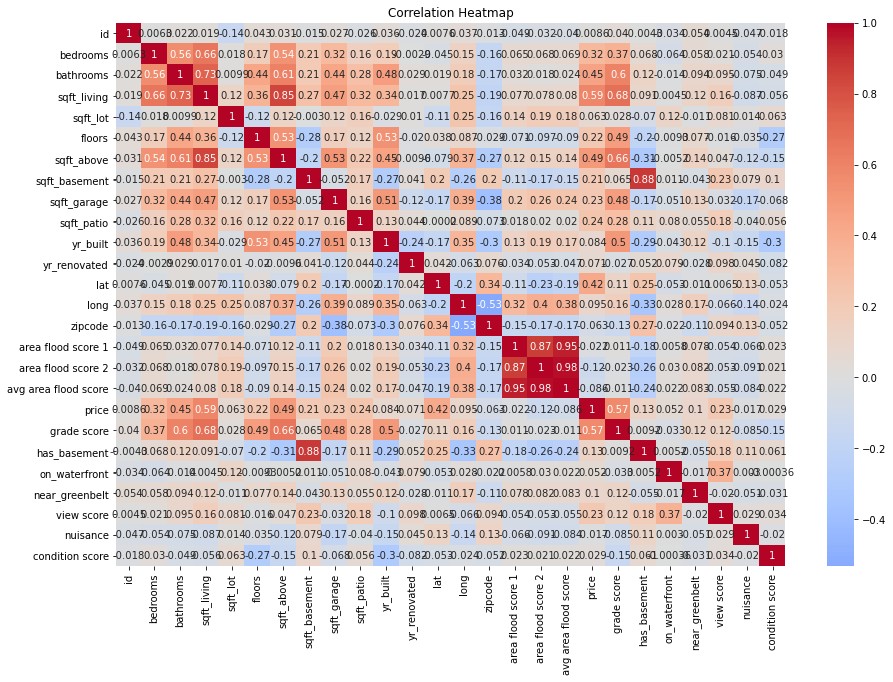

In [118]:
#corr = df.corr()

# Plot heatmap
#plt.figure(figsize = (15,10))
#sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
#plt.title('Correlation Heatmap')
#plt.show()

In [119]:
# since bedrooms, bathrooms and sqft living are moderately correlated with each other, 

# maybe we should drop one or more? though maybe not correlated strongly enough

In [120]:
#sample = df.sample(10000)

#profile_2 = ProfileReport(sample, minimal=True)
#profile_2.to_file("output.html")

In [121]:
#profile_2

In [122]:
# getting rid of sqft basement column. we need to remove those zeroes. we now have a column that indicates
# whether a property has a basement, and another column with the square footage if it in fact has a basement.
# now, our average is an average for PROPERTIES THAT HAVE BASEMENTS


#df = df.assign(sqft_basement_2=df['sqft_basement'])
#df.loc[df['has_basement'] == 1, 'sqft_basement_2'] = df.loc[df['has_basement'] == '1', 'sqft_basement']


In [123]:
#df.drop(columns='sqft_basement', axis=1, inplace=True)

In [124]:
#df.rename(columns={'sqft_basement_2': 'sqft_basement'}, inplace=True)

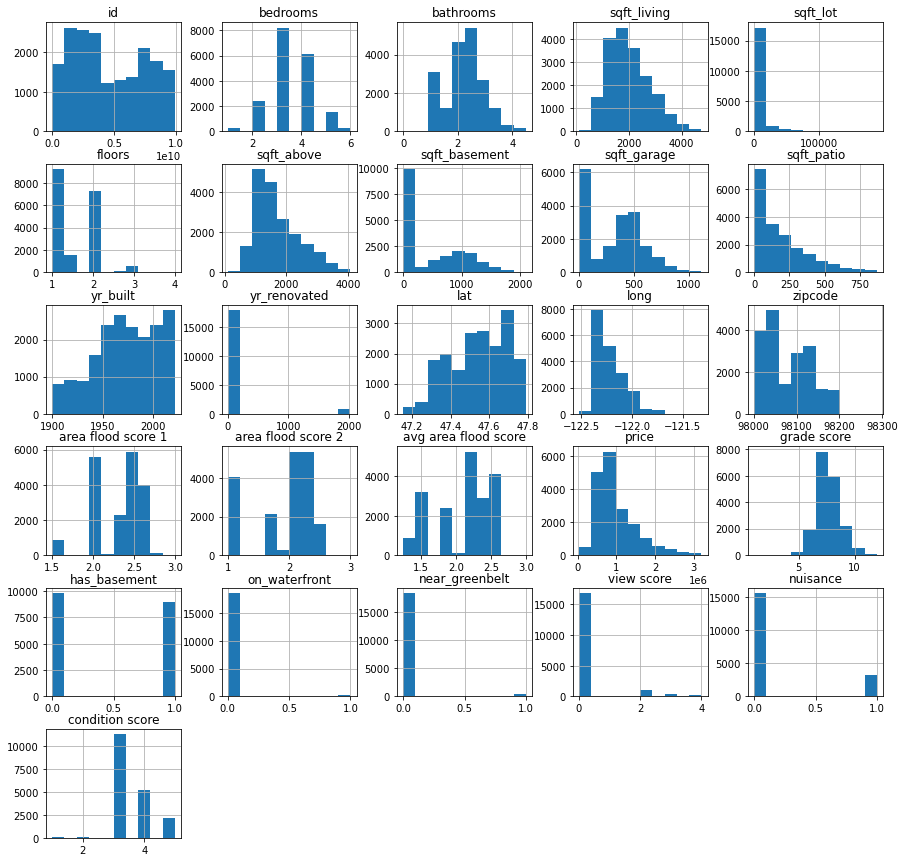

In [125]:
df.hist(figsize = (15,15))
plt.show()

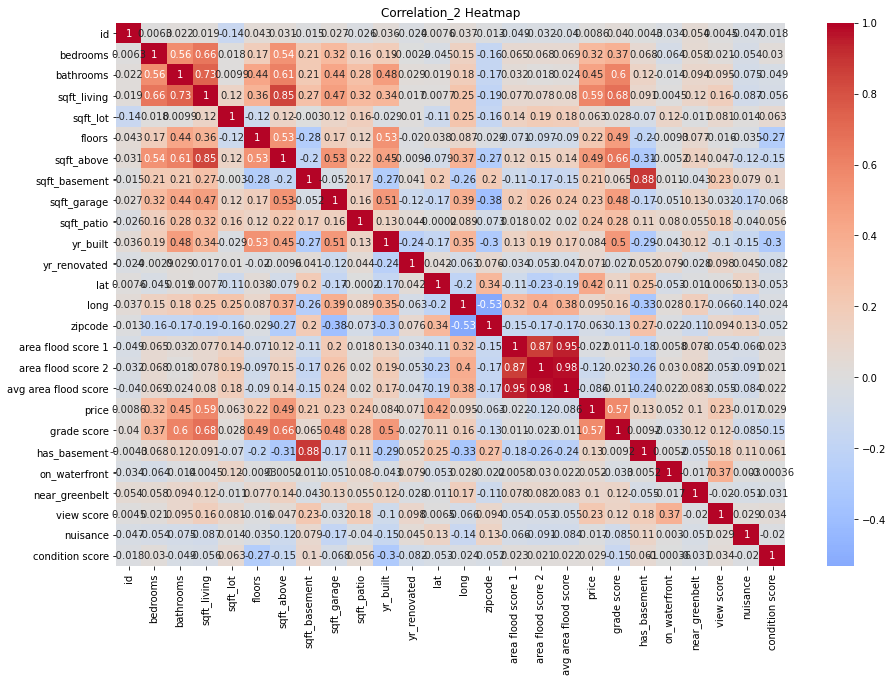

In [126]:
corr_2 = df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr_2, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation_2 Heatmap')
plt.show()

In [127]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'street address', 'city', 'zipcode',
       'floodzones in zipcode', 'area flood score 1', 'area flood score 2',
       'avg area flood score', 'price', 'grade score', 'has_basement',
       'on_waterfront', 'near_greenbelt', 'view score', 'nuisance',
       'condition score'],
      dtype='object')

In [128]:
df.drop(labels=['heat_source', 'sewer_system'], axis=1, inplace=True)

In [129]:
df.sqft_basement

16025       0
9971     2050
8943        0
19496       0
21740       0
         ... 
21575       0
5390        0
860         0
15795    1140
23654       0
Name: sqft_basement, Length: 18805, dtype: int64

In [130]:
#df.sample(10000)
#profile_4 = ProfileReport(sample, minimal=True)
#profile_4.to_file("output.html")
#profile_4

In [131]:
# df.to_csv('train_cleaned.csv', index=False)

In [132]:
#creating test data, cleaning in same way per researchgate

X_test.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
20230  4322300140  1/17/2022         3        2.5         1979     13439   
22971  3928000040  11/3/2021         4        3.0         2450      8772   
24784  3359500340  9/20/2021         3        1.0         1100      3000   
11627  5493100075   7/7/2021         6        6.5         5600     20973   
18417  3629200040  3/30/2022         4        3.0         3800     10194   

       floors waterfront greenbelt nuisance  ... yr_renovated        lat  \
20230     1.0         NO        NO       NO  ...            0  47.281065   
22971     2.0         NO        NO       NO  ...            0  47.192910   
24784     1.0         NO        NO      YES  ...            0  47.673490   
11627     2.0         NO        NO       NO  ...            0  47.601660   
18417     1.0         NO        NO       NO  ...         2006  47.532310   

            long              street address           city  zipcode  \
20230 -122.29882     35770 27th Avenue South    Federal Way    98003   
22971 -121.98087                243 Hogan Dr       Enumclaw    98022   
24784 -122.32373   6045 5th Avenue Northeast        Seattle    98115   
11627 -122.20701  989 100th Avenue Southeast       Bellevue    98004   
18417 -122.22625   7815 85th Place Southeast  Mercer Island    98040   

            floodzones in zipcode  area flood score 1  area flood score 2  \
20230                       ['X']                 2.0            1.000000   
22971  ['A', 'X', 'D', 'AE', 'C']                 2.0            1.800000   
24784            ['X', 'AE', 'C']                 2.0            1.666667   
11627                 ['X', 'AE']                 2.5            2.000000   
18417                       ['X']                 2.0            1.000000   

       avg area flood score  
20230              1.500000  
22971              1.900000  
24784              1.833333  
11627              2.250000  
18417              1.500000  

[5 rows x 30 columns]

In [133]:
dftest = X_test.copy()

In [134]:
dftest = pd.concat([X_test, y_test], axis = 1)

In [135]:
dftest['grade score'] = dftest['grade'].str.split().str[0]
dftest['grade score'] = dftest['grade score'].astype(int)
dftest.drop(labels='grade', axis=1, inplace=True)
dftest['has_basement'] = dftest['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
dftest['on_waterfront'] = dftest['waterfront'].apply(lambda x: 0 if x == "NO" else 1)
dftest.drop(labels='waterfront', axis=1, inplace=True)
dftest['near_greenbelt'] = dftest['greenbelt'].apply(lambda x: 0 if x == "NO" else 1)
dftest.drop(labels='greenbelt', axis=1, inplace=True)
dftest['date'] = pd.to_datetime(dftest['date'])

category_labels = {'NONE': 0,
                   'FAIR': 1,
                   'AVERAGE': 2,
                   'GOOD': 3, 
                   'EXCELLENT': 4}

dftest['view score'] = dftest['view'].map(category_labels)
dftest.drop(labels='view', axis=1, inplace=True)
dftest['nuisance_2'] = dftest['nuisance'].apply(lambda x: 1 if x == "YES" else 0)
dftest.drop(labels='nuisance', axis=1, inplace=True)
dftest.rename(columns={'nuisance_2': 'nuisance'}, inplace=True)
category_labels_2 = {'Poor': 1,
                   'Fair': 2,
                   'Average': 3,
                   'Good': 4, 
                   'Very Good': 5}
dftest['condition score'] = dftest['condition'].map(category_labels_2)
dftest.drop(labels='condition', axis=1, inplace=True)
df_3 = remove_outliers(dftest)
quantile_99 = dftest['price'].quantile(q = .99)
dftest = dftest[dftest['price']<=quantile_99]

dftest.drop(labels=['heat_source', 'sewer_system'], axis=1, inplace=True)

In [136]:
dftest.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
20230  4322300140 2022-01-17         3        2.5         1979     13439   
22971  3928000040 2021-11-03         4        3.0         2450      8772   
24784  3359500340 2021-09-20         3        1.0         1100      3000   
18417  3629200040 2022-03-30         4        3.0         3800     10194   
21521  5469501620 2022-05-19         4        3.5         3840     15347   

       floors  sqft_above  sqft_basement  sqft_garage  ...  \
20230     1.0        1180           1079          280  ...   
22971     2.0        2450              0          460  ...   
24784     1.0        1100              0            0  ...   
18417     1.0        3060           1320          580  ...   
21521     1.0        1920           1920          580  ...   

       area flood score 2  avg area flood score      price  grade score  \
20230            1.000000              1.500000   600000.0            7   
22971            1.800000              1.900000   698507.0            8   
24784            1.666667              1.833333   686500.0            6   
18417            1.000000              1.500000  2720000.0            9   
21521            2.333333              2.500000   900000.0            9   

       has_basement on_waterfront near_greenbelt  view score nuisance  \
20230             1             0              0           0        0   
22971             0             0              0           0        0   
24784             0             0              0           0        1   
18417             1             0              0           0        0   
21521             1             0              0           2        0   

       condition score  
20230                5  
22971                3  
24784                3  
18417                3  
21521                4  

[5 rows x 30 columns]

In [137]:
dftest.to_csv('test_cleaned.csv', index=False)